In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./NN_result/lt_df_NN_rank_9days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[1:1+4], ignore_index=True)

In [4]:
full_table

,target,next,rank,NN_rank
0,2063176,1793668,53.00,21
1,1036421,215370,26.00,73
2,1036421,215370,26.00,73
3,4364467,632080,19.00,35
4,632080,4272037,20.00,29
...,...,...,...,...
952774,3087929,3292913,88.00,13
952775,4082039,3801509,48.00,49
952776,932794,488456,80.00,25
952777,1354952,1846009,39.00,2


In [5]:
full_table.describe()

,rank,NN_rank
count,952779.00,952779.00
mean,30.48,33.68
std,28.11,28.53
min,1.00,1.00
25%,6.00,9.00
50%,21.00,26.00
75%,50.00,54.00
max,99.00,99.00


In [6]:
table_grby = full_table.groupby(['target', 'next'])
pd.DataFrame(table_grby.size())

0
target  next       
100000  832989    1
1000061 1742870   1
100021  2719059   1
        3649916   1
        632903    1
...              ..
999828  4945426  25
        5114143   3
        730054    2
        766525   21
999951  17116     1

[308936 rows x 1 columns]

In [7]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [8]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [9]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
df_table

,target,next,occur,rank,NN_rank
0,100000,832989,1,51.00,66
1,1000061,1742870,1,47.00,97
2,100021,2719059,1,50.00,70
3,100021,3649916,1,92.00,43
4,100021,632903,1,58.00,31
...,...,...,...,...,...
308931,999828,4945426,25,5.00,6
308932,999828,5114143,3,52.00,50
308933,999828,730054,2,35.00,13
308934,999828,766525,21,7.00,4


In [10]:
df_table.describe()

,occur,rank,NN_rank
count,308936.00,308936.00,308936.00
mean,3.08,39.25,42.30
std,7.27,28.98,29.00
min,1.00,1.00,1.00
25%,1.00,13.00,17.00
50%,1.00,34.00,38.00
75%,2.00,63.00,66.00
max,389.00,99.00,99.00


In [11]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank
count,205.00,205.00
mean,15.31,14.80
std,11.25,11.43
min,1.00,1.00
25%,4.75,4.00
50%,15.91,13.50
75%,22.36,24.17
max,75.00,50.00


In [12]:
# df_table.groupby('occur').mean().to_csv('result_-107days.csv')

In [13]:
# df_table.groupby('occur').mean().plot(figsize=(20,10))[:100]

---

In [15]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [16]:
df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [17]:
df_table

,target,next,occur,rank,NN_rank,label,X_1
0,100000,832989,1,51.00,66,False,0.49
1,1000061,1742870,1,47.00,97,False,0.53
2,100021,2719059,1,50.00,70,False,0.50
3,100021,3649916,1,92.00,43,True,0.08
4,100021,632903,1,58.00,31,True,0.42
...,...,...,...,...,...,...,...
308931,999828,4945426,25,5.00,6,False,0.95
308932,999828,5114143,3,52.00,50,True,0.48
308933,999828,730054,2,35.00,13,True,0.65
308934,999828,766525,21,7.00,4,True,0.93


In [18]:
df_table.describe()

,occur,rank,NN_rank,X_1
count,308936.00,308936.00,308936.00,308936.00
mean,3.08,39.25,42.30,0.61
std,7.27,28.98,29.00,0.29
min,1.00,1.00,1.00,0.01
25%,1.00,13.00,17.00,0.37
50%,1.00,34.00,38.00,0.66
75%,2.00,63.00,66.00,0.87
max,389.00,99.00,99.00,0.99


In [19]:
df_table.nunique()

target     67303
next       40916
occur        205
rank          99
NN_rank       99
label          2
X_1           99
dtype: int64

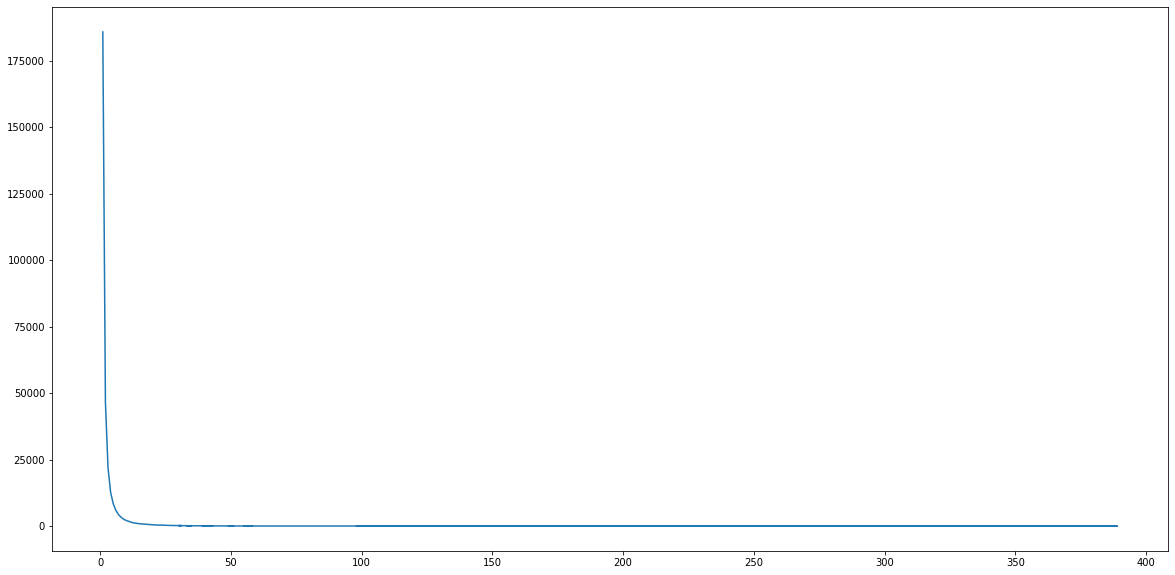

In [20]:
df_table['occur'].value_counts().plot(figsize=(20,10))

In [22]:
df_table['occur'].value_counts()

1      185857
2       46620
3       21888
4       12625
5        8385
        ...  
167         1
171         1
176         1
182         1
246         1
Name: occur, Length: 205, dtype: int64

In [23]:
max_occur = max(df_table['occur'])
df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))

1     2.03
2     1.80
3     1.68
4     1.58
5     1.51
      ... 
167   0.00
171   0.00
176   0.00
182   0.00
246   0.00
Name: occur, Length: 205, dtype: float64

In [24]:
pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [25]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [26]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [27]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df_occur

,occur,counts,log10,log10R,log10R_MinMax
0,1,185857,2.03,0.00,0.00
1,2,46620,1.80,0.23,0.11
2,3,21888,1.68,0.36,0.18
3,4,12625,1.58,0.45,0.22
4,5,8385,1.51,0.52,0.26
5,6,5891,1.46,0.58,0.28
6,7,4327,1.40,0.63,0.31
7,8,3307,1.36,0.68,0.33
8,9,2575,1.32,0.72,0.35
9,10,2098,1.28,0.75,0.37


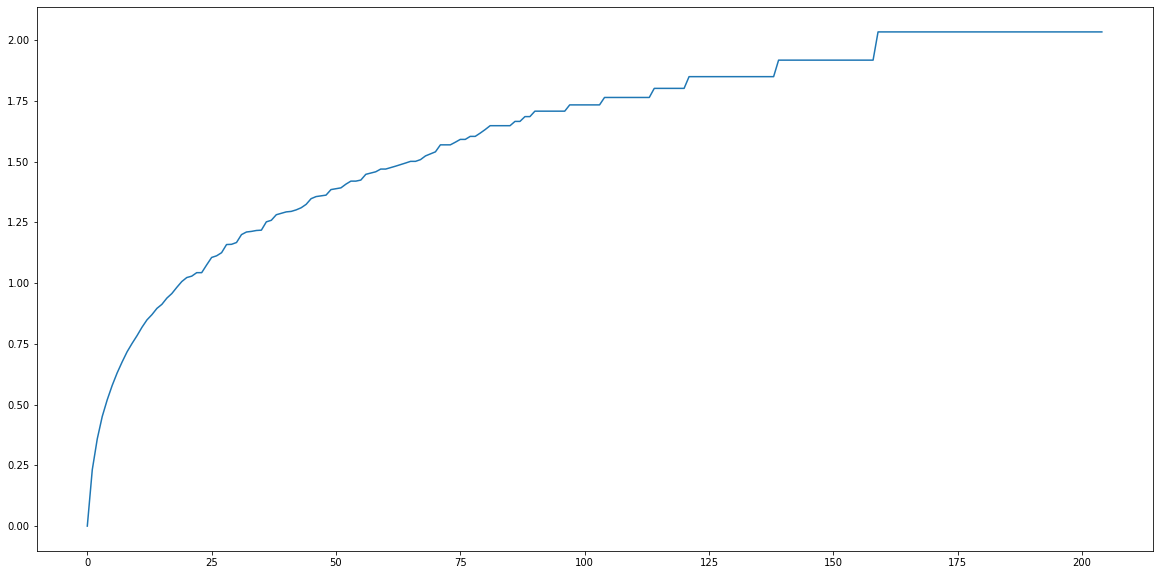

In [28]:
df_occur['log10R'].plot(figsize=(20,10))

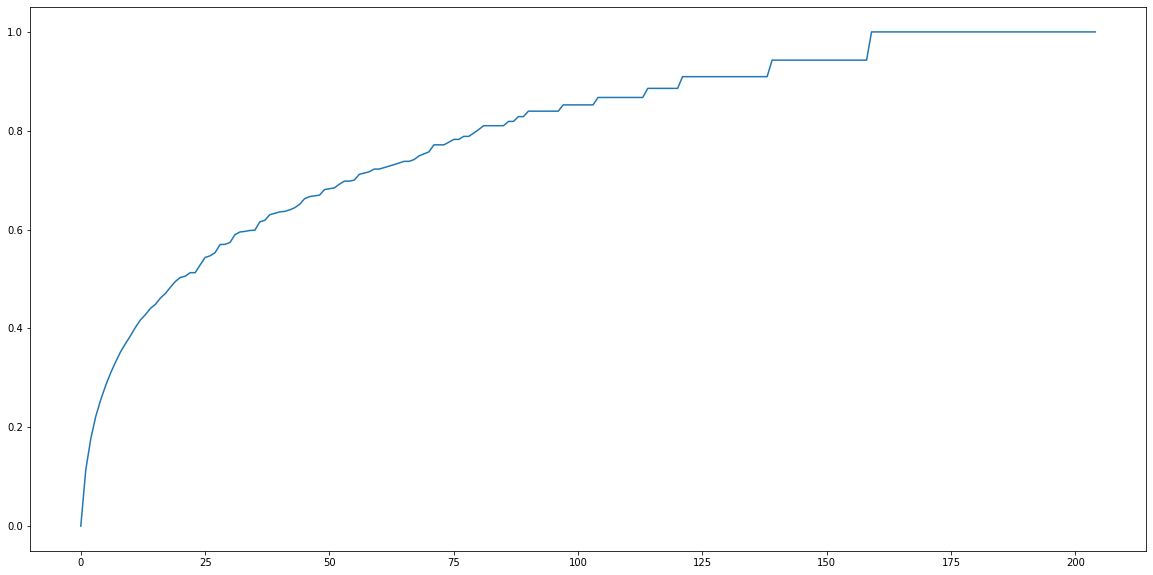

In [29]:
df_occur['log10R_MinMax'].plot(figsize=(20,10))

---

In [30]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
df_occur

,occur,log10R_MinMax
0,1,0.00
1,2,0.11
2,3,0.18
3,4,0.22
4,5,0.26
5,6,0.28
6,7,0.31
7,8,0.33
8,9,0.35
9,10,0.37


In [31]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [32]:
df_table_ok

,target,next,occur,rank,NN_rank,label,X_1,X_2
0,100000,832989,1,51.00,66,False,0.49,0.00
1,1000061,1742870,1,47.00,97,False,0.53,0.00
2,100021,2719059,1,50.00,70,False,0.50,0.00
3,100021,3649916,1,92.00,43,True,0.08,0.00
4,100021,632903,1,58.00,31,True,0.42,0.00
...,...,...,...,...,...,...,...,...
308931,999828,4945426,25,5.00,6,False,0.95,0.53
308932,999828,5114143,3,52.00,50,True,0.48,0.18
308933,999828,730054,2,35.00,13,True,0.65,0.11
308934,999828,766525,21,7.00,4,True,0.93,0.50


In [33]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_ok.loc[:,['X_1','X_2']]
y = df_table_ok['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
#使用決策樹演算法
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
#評估決策樹模型好壞
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.74      0.79      0.76     51870
        True       0.71      0.64      0.67     40811

    accuracy                           0.72     92681
   macro avg       0.72      0.72      0.72     92681
weighted avg       0.72      0.72      0.72     92681



In [36]:
print(confusion_matrix(y_test,predictions))

[[40968 10902]
 [14617 26194]]


---

In [37]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

In [38]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.74      0.79      0.76     51870
        True       0.71      0.65      0.67     40811

    accuracy                           0.73     92681
   macro avg       0.72      0.72      0.72     92681
weighted avg       0.72      0.73      0.72     92681



In [39]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y_test,rfc_pred))

[[40835 11035]
 [14425 26386]]


---

In [40]:
full_table = pd.concat(lt_df_NN_rank[1:], ignore_index=True)

In [41]:
table_grby = full_table.groupby(['target', 'next'])
# pd.DataFrame(table_grby.size())

In [42]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [43]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [44]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
# df_table

In [45]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [46]:
df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [47]:
# pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [48]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [49]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [50]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
# df_occur

In [51]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [63]:
# 308936 -4days
df_table_testday = pd.DataFrame(df_table_ok[308936:])
df_table_testday

,target,next,occur,rank,NN_rank,label,X_1,X_2
308936,4035865,674112,1,96.00,15,True,0.04,0.00
308937,4035865,724199,2,9.00,29,False,0.91,0.11
308938,4035865,891042,2,1.00,14,False,0.99,0.11
308939,4035865,956343,1,78.00,73,True,0.22,0.00
308940,4035930,1006,7,30.00,11,True,0.70,0.28
...,...,...,...,...,...,...,...,...
470513,999828,5114143,5,52.00,50,True,0.48,0.24
470514,999828,730054,4,35.00,13,True,0.65,0.20
470515,999828,766525,44,7.00,4,True,0.93,0.58
470516,999949,1062644,1,4.00,36,False,0.96,0.00


In [64]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_testday.loc[:,['X_1','X_2']]
y = df_table_testday['label']

---

In [65]:
#評估決策樹模型好壞
predictions = dtree.predict(X)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions))

              precision    recall  f1-score   support

       False       0.75      0.76      0.75     89871
        True       0.69      0.67      0.68     71711

    accuracy                           0.72    161582
   macro avg       0.72      0.72      0.72    161582
weighted avg       0.72      0.72      0.72    161582



In [66]:
print(confusion_matrix(y,predictions))

[[68573 21298]
 [23394 48317]]


---

In [67]:
rfc_pred = rfc.predict(X)
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y,rfc_pred))

              precision    recall  f1-score   support

       False       0.75      0.76      0.75     89871
        True       0.69      0.68      0.69     71711

    accuracy                           0.72    161582
   macro avg       0.72      0.72      0.72    161582
weighted avg       0.72      0.72      0.72    161582



In [68]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y,rfc_pred))

[[68331 21540]
 [23038 48673]]


---

In [69]:
df_table_testday['pred'] = predictions

In [70]:
df_table_testday['switch'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred'] else df['rank'], axis=1)

In [71]:
df_table_testday

,target,next,occur,rank,NN_rank,label,X_1,X_2,pred,switch
308936,4035865,674112,1,96.00,15,True,0.04,0.00,True,15.00
308937,4035865,724199,2,9.00,29,False,0.91,0.11,False,9.00
308938,4035865,891042,2,1.00,14,False,0.99,0.11,False,1.00
308939,4035865,956343,1,78.00,73,True,0.22,0.00,True,73.00
308940,4035930,1006,7,30.00,11,True,0.70,0.28,False,30.00
...,...,...,...,...,...,...,...,...,...,...
470513,999828,5114143,5,52.00,50,True,0.48,0.24,True,50.00
470514,999828,730054,4,35.00,13,True,0.65,0.20,True,13.00
470515,999828,766525,44,7.00,4,True,0.93,0.58,False,7.00
470516,999949,1062644,1,4.00,36,False,0.96,0.00,False,4.00


In [72]:
df_table_testday.describe()

,occur,rank,NN_rank,X_1,X_2,switch
count,161582.00,161582.00,161582.00,161582.00,161582.00,161582.00
mean,4.06,40.82,43.89,0.59,0.10,32.41
std,11.57,29.08,29.13,0.29,0.14,26.44
min,1.00,1.00,1.00,0.01,0.00,1.00
25%,1.00,15.00,18.00,0.35,0.00,11.00
50%,1.00,36.00,41.00,0.64,0.00,26.00
75%,3.00,65.00,68.00,0.85,0.16,46.00
max,600.00,99.00,99.00,0.99,1.00,99.00
